In [2]:
import numpy as np
import keras
import tensorflow as tf2
import matplotlib.pyplot as plt
from sklearn.tree import  plot_tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

In [124]:
def PCA(X, n_components=2):
    M = np.mean(X.T, axis=1)
    C = X - M
    CV = np.cov(C.T)
    vals,vecs = np.linalg.eig(CV)
    vecs_sorted = vecs[:,np.argsort(vals)[::-1]]
    return (vals, (vecs_sorted[:,:n_components]).astype(np.float64))

In [125]:
tf2.keras.datasets.mnist.load_data(path="mnist.npz")
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

train_mask = np.isin(y_train, [3])
test_mask = np.isin(y_test, [3])

X_train, Y_train = X_train[train_mask], y_train[train_mask]
X_test, Y_test = X_test[test_mask], y_test[test_mask]

X_train = X_train[:200]

X_train_flattened = X_train[:200].reshape(200, 784)
vals, vecs = PCA(X_train_flattened, n_components=3)

mu = X_train_flattened.mean(axis=0)
v1,v2,v3 = vecs[:,0].reshape(28,28), vecs[:,1].reshape(28,28), vecs[:,2].reshape(28,28)

C:\Users\kishl\AppData\Local\Temp\ipykernel_19752\3832464061.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  return (vals, (vecs_sorted[:,:n_components]).astype(np.float64))


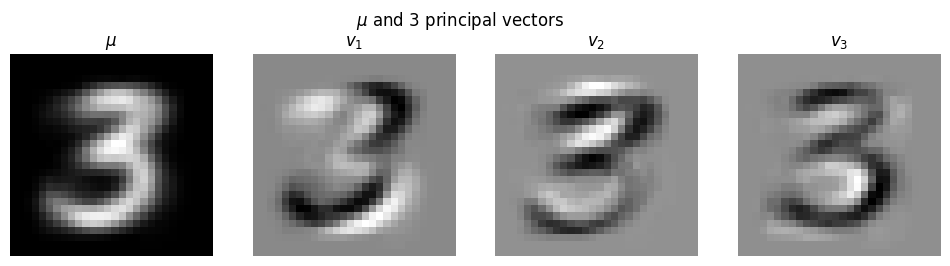

In [126]:
fig = plt.figure(figsize=(12,3))
fig.suptitle(r'$\mu$ and $3$ principal vectors')
ax0 = fig.add_subplot(1,4,1)
plt.axis('off')
plt.title(r'$\mu$')
ax0.imshow(mu.reshape(28,28),cmap='gray');
ax1 = fig.add_subplot(1,4,2)
plt.axis('off')
plt.title(r'$v_1$')
ax1.imshow(v1.reshape(28,28),cmap='gray');
ax2 = fig.add_subplot(1,4,3)
plt.axis('off')
plt.title(r'$v_2$')
ax2.imshow(v2.reshape(28,28),cmap='gray');
ax3 = fig.add_subplot(1,4,4)
plt.axis('off')
plt.title(r'$v_3$')
ax3.imshow(v3.reshape(28,28),cmap='gray');

C:\Users\kishl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


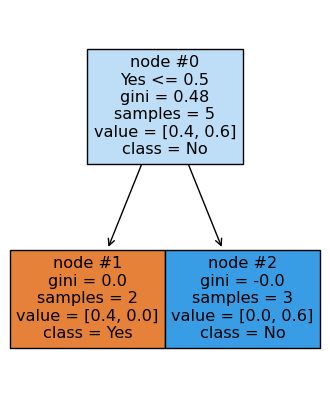

Decision Tree 1


In [9]:

# Create a dictionary with the data for each student
data_adaboost = {
    'ID': [1, 2, 3, 4, 5],
    'Age': [25, 22, 30, 28, 25],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'Major': ['Computer Science', 'Biology', 'Psychology', 'Other', 'Computer Science'],
    'GPA': [3.7, 3.5, 3.9, 3.2, 3.8],
    'Research experience': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'Accepted into postgraduate program': ['Yes', 'No', 'Yes', 'No', 'Yes']
}

# Create the dataframe to apply classifier
df = pd.DataFrame(data_adaboost)

X = df.iloc[:, 1:6] # Exclude the output
y = df.iloc[:, 6]

# One hot encoding
X_gender = pd.get_dummies(X['Gender'], sparse=True, drop_first = True)
X_major = pd.get_dummies(X['Major'], sparse=True, drop_first = True)
X_research = pd.get_dummies(X['Research experience'], sparse=True, drop_first = True)

X = pd.concat([X, X_gender, X_major, X_research], axis = 1)
X.drop(['Gender', 'Major', 'Research experience'], axis=1, inplace=True)

# Apply Adaboost
model = AdaBoostClassifier(n_estimators=3)
model.fit(X, y)


features = X.columns
target = y

def plot_dec_tree(model, iteration, feature_name, target_name):
    plt.figure(figsize=[4.0,5.0])
    plot_tree(model, filled=True, feature_names=feature_name, class_names=target_name, node_ids=True)
    plt.show()
    print("Decision Tree {}".format(iteration + 1))

for i in range(len(model.estimators_)):
    plot_dec_tree(model.estimators_[i], i, features, target)